Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)  #degree, interaction_only, include_bias
phi = poly.fit_transform(X)
print(phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
weights = linalg.inv(phi.T @ phi) @ phi.T @ y
print(weights)
weights_2 = linalg.pinv(phi) @ y
print(weights_2)


[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error
D = [(X[i], y[i]) for i in range(len(X))]
print("D: ", D)
h = [weights.T @ x for x in phi]
print("h: ", h)
E1 = mean_squared_error(y, h)
E2 = 1 / 2 * np.sum([np.square(y[i] - h[i]) for i in range(len(h))])
print("E1: {0}\nE2: {1}".format(E1, E2))

D:  [(array([0]), 4), (array([1]), 1), (array([2]), 2), (array([4]), 5)]
h:  [2.2, 2.6571428571428575, 3.1142857142857143, 4.0285714285714285]
E1: 2.042857142857143
E2: 4.085714285714286


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
import numpy as np
weights_exact = linalg.inv(phi) @ y
#add_dimensions = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
#add_dimensions = np.array([[1, 2, 3, 4], [5, 6, 8, 8]])
#phi_2 = phi @ add_dimensions
#weights_exact = linalg.inv(phi_2) @ y

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_)
h = reg.predict(X)
print("h: ", h)
print("E: ", mean_squared_error(y, h))

2.2 [0.45714286]
h:  [2.2        2.65714286 3.11428571 4.02857143]
E:  2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return [f(instance) + normal(0, noise) for instance in X]

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, 200)

X_first = X
y_first = y

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

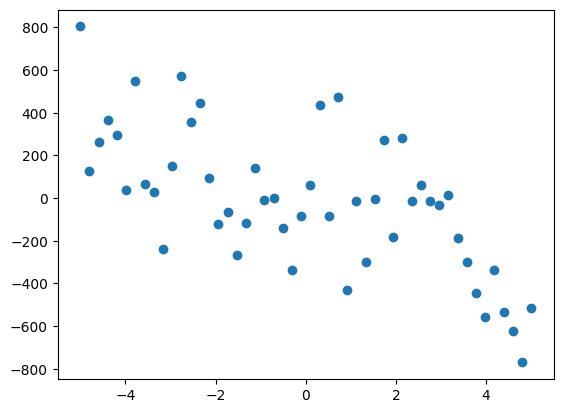

In [11]:
plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

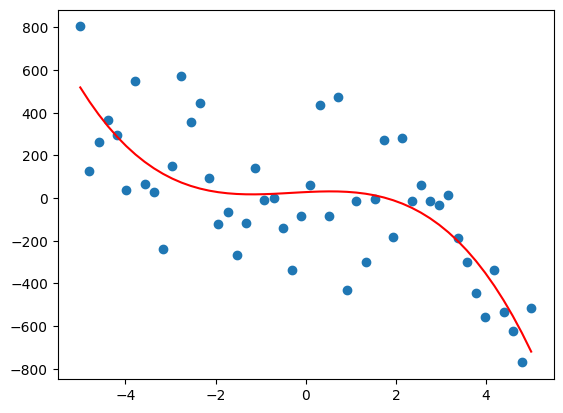

E: 48626.63385565863


In [12]:
poly2 = PolynomialFeatures(3)  #degree, interaction_only, include_bias
phi = poly2.fit_transform(X)
w = linalg.pinv(phi) @ y
h = [w.T @ x for x in phi]
plt.plot(X, h, color="r")
plt.scatter(X, y)
plt.show()
print("E: {}".format(mean_squared_error(y, h)))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

d = 1, E: 61791.41450220012
d = 3, E: 48626.63385565863
d = 5, E: 48060.36671432225
d = 10, E: 42307.90978830321
d = 20, E: 24310.27736238162


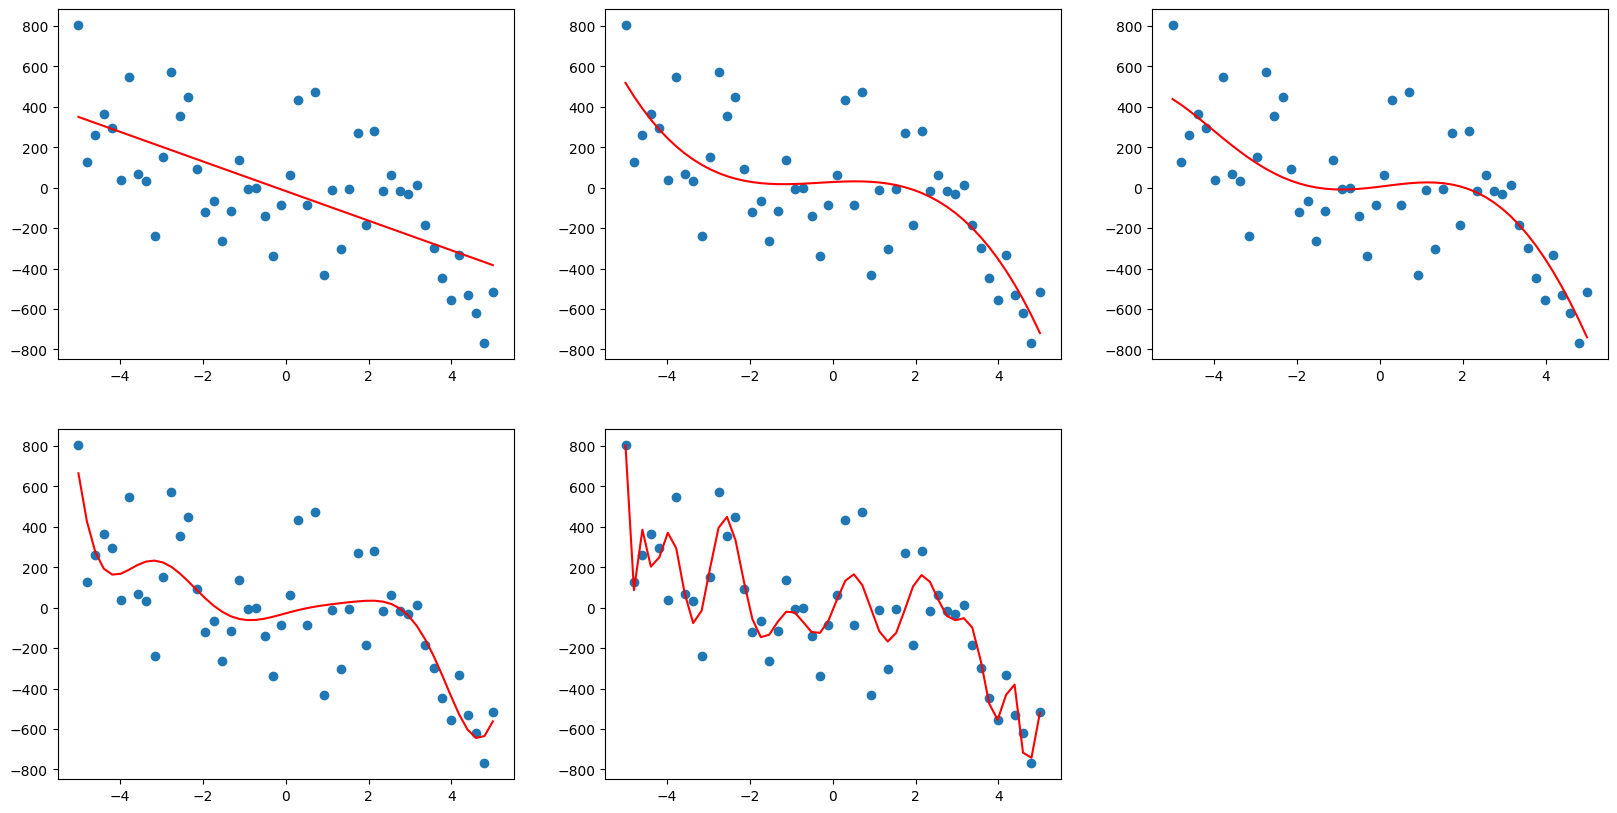

In [13]:
degrees = [1, 3, 5, 10, 20]
fig = plt.figure(figsize=(20, 10))
i = 0

for d in degrees:
    i += 1
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X)
    w = linalg.pinv(phi) @ y
    h = [w.T @ x for x in phi]

    s = fig.add_subplot(2, 3, i)
    s.plot(X, h, color="r")
    s.scatter(X, y)

    E = mean_squared_error(y, h)
    print("d = {0}, E: {1}".format(d, E))

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

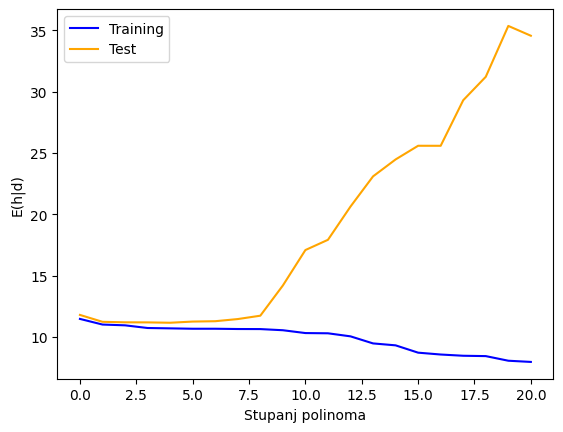

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train_second, X_test_second = X_train, X_test
y_train_second, y_test_second = y_train, y_test

degrees = [i for i in range(21)]
E_train = []
E_test = []
for d in degrees:
    poly = PolynomialFeatures(d)
    phi_train = poly.fit_transform(X_train)
    phi_test = poly.fit_transform(X_test)
    w = linalg.pinv(phi_train) @ y_train

    h_train = [w.T @ x for x in phi_train]
    h_test = [w.T @ x for x in phi_test]
    E_train.append(mean_squared_error(y_train, h_train))
    E_test.append(mean_squared_error(y_test, h_test))

plt.plot(degrees, np.log(E_train), color="blue", label="Training")
plt.plot(degrees, np.log(E_test), color="orange", label="Test")
plt.xlabel("Stupanj polinoma")
plt.ylabel("E(h|d)")
plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

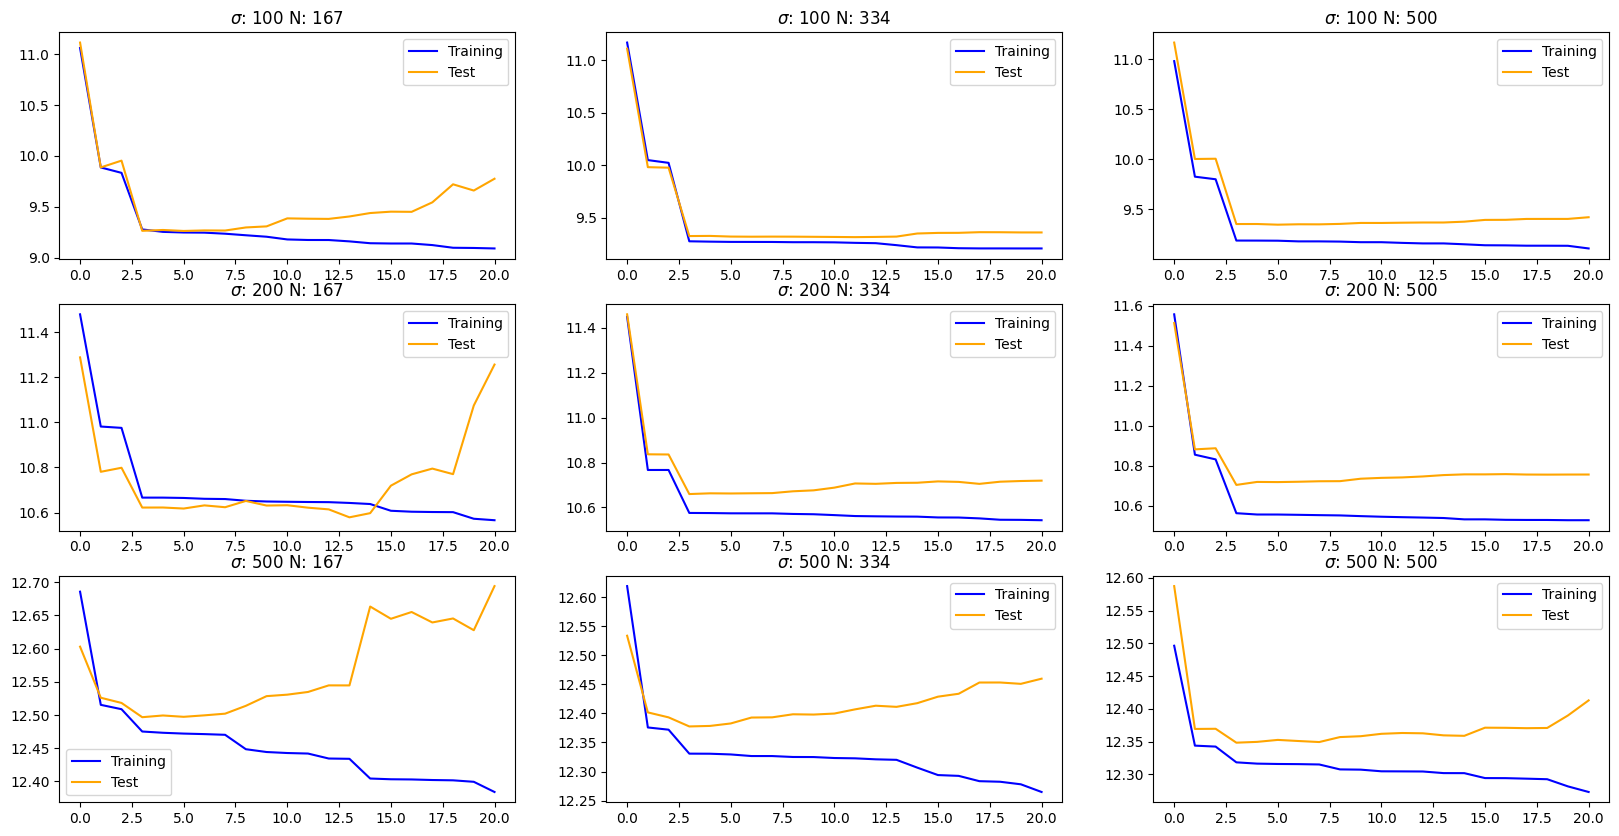

In [27]:
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5, random_state=42)
noises = [100, 200, 500]
degrees = [i for i in range(21)]
fig = plt.figure(figsize = (20, 10))
j = 1
for noise in noises:
    for i in range(3):
        E_train = []
        E_test = []
        mask = np.arange(len(X_train)) % 3 <= i
        X_tret_train = X_train[mask]
        X_tret_test = X_test[mask]
        
        y_tret_train = make_labels(X_tret_train, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, noise)
        y_tret_test = make_labels(X_tret_test, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, noise)

        for d in degrees:
            poly = PolynomialFeatures(d)
            phi_train = poly.fit_transform(X_tret_train)
            phi_test = poly.fit_transform(X_tret_test)
            w = linalg.pinv(phi_train) @ y_tret_train
            
            h_train = [w.T @ x for x in phi_train]
            h_test = [w.T @ x for x in phi_test]
            E_train.append(mean_squared_error(y_tret_train, h_train))
            E_test.append(mean_squared_error(y_tret_test, h_test))
        
        s = fig.add_subplot(3, 3, j)
        s.plot(degrees, np.log(E_train), color="blue", label="Training")
        s.plot(degrees, np.log(E_test), color="orange", label="Test")
        s.set_title("$\sigma$: {} N: {}".format(noise, len(X_tret_train)))
        s.legend()
        j += 1
        

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [28]:
factors = [0, 1, 10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
poly = PolynomialFeatures(3)
phi = poly.fit_transform(X)

trunacted = np.identity(4)
trunacted[0][0] = 0

for factor in factors:
    inv = linalg.inv(phi.T @ phi + factor * trunacted)
    weights = inv @ phi.T @ y
    print("lambda = {:2}: {}".format(factor, weights))

lambda =  0: [ 4.         -5.91666667  3.375      -0.45833333]
lambda =  1: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda = 10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [29]:
from sklearn.linear_model import Ridge
for factor in factors:
    r = Ridge(factor)
    r.fit(phi, y)
    print("lambda = {:2}:\n{}".format(factor, r.intercept_))
    print(r.coef_)

lambda =  0:
4.000000000000021
[ 0.         -5.91666667  3.375      -0.45833333]
lambda =  1:
3.0569614512471652
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
lambda = 10:
2.4944418431229725
[ 0.         -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

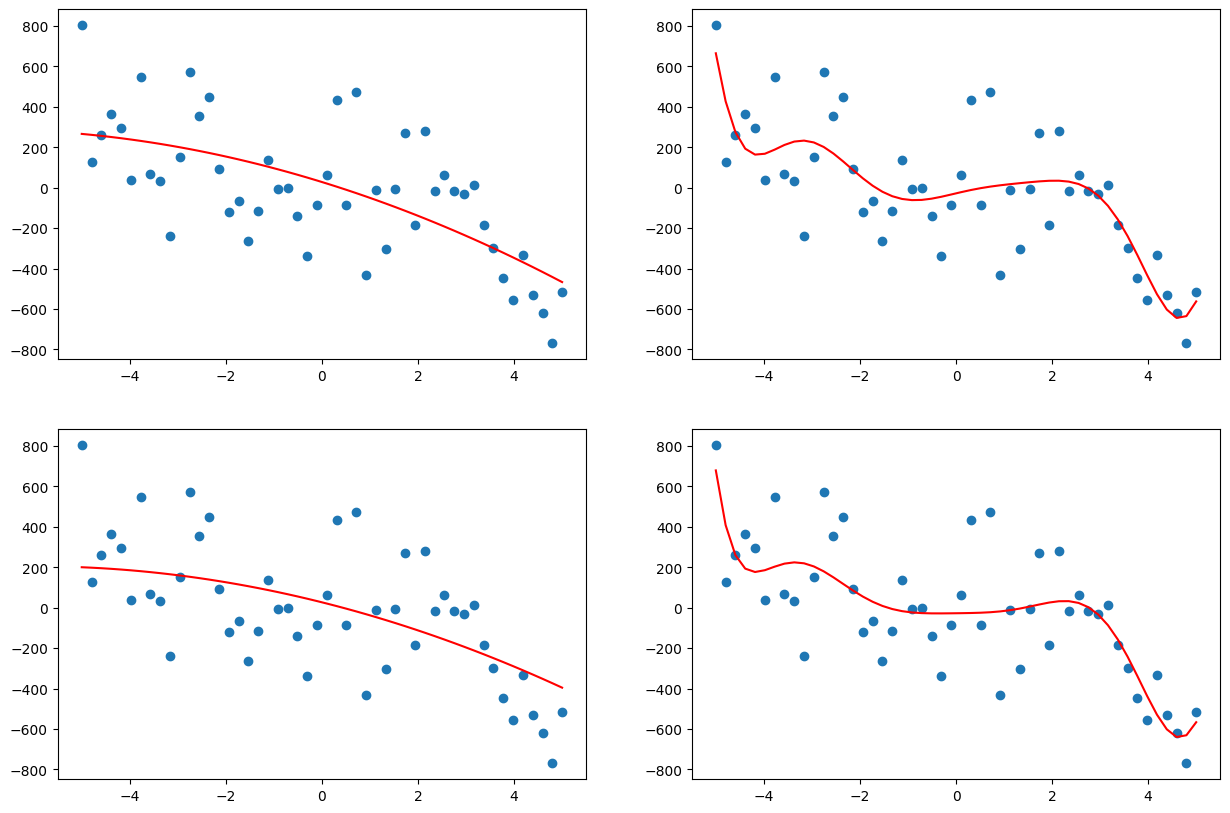

In [31]:
factors = [0, 100]
degrees = [2, 10]

X = X_first
y = y_first

fig = plt.figure(figsize = (15, 10))

j = 1
for factor in factors:
    for d in degrees:
        trunacted = np.identity(d + 1)
        trunacted[0][0] = 0

        poly = PolynomialFeatures(d)
        phi = poly.fit_transform(X)

        inv = linalg.inv(phi.T @ phi + factor * trunacted)
        w = inv @ phi.T @ y
        h = [w.T @ x for x in phi]
        
        s = fig.add_subplot(2, 2, j)
        s.plot(X, h, color="r")
        s.scatter(X, y)
        j += 1

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


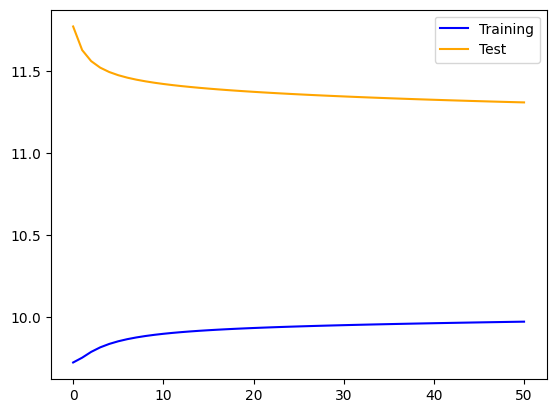

In [32]:
d = 10
factors = np.arange(51)
X = X_first
y = y_first
E_train = []
E_test = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
for factor in factors:
    poly = PolynomialFeatures(d)
    phi_train = poly.fit_transform(X_train)
    phi_test = poly.fit_transform(X_test)

    trunacted = np.identity(d + 1)
    trunacted[0][0] = 0
    inv = linalg.inv(phi_train.T @ phi_train + factor * trunacted)
    w = inv @ phi_train.T @ y_train
    h_train = [w.T @ x for x in phi_train]
    h_test = [w.T @ x for x in phi_test]
    E_train.append(mean_squared_error(y_train, h_train))
    E_test.append(mean_squared_error(y_test, h_test))

plt.plot(factors, np.log(E_train), color="blue", label="Training")
plt.plot(factors, np.log(E_test), color="orange", label="Test")
plt.legend()
plt.show()


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [33]:
def nonzeroes(coef, tol=1e-6):
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

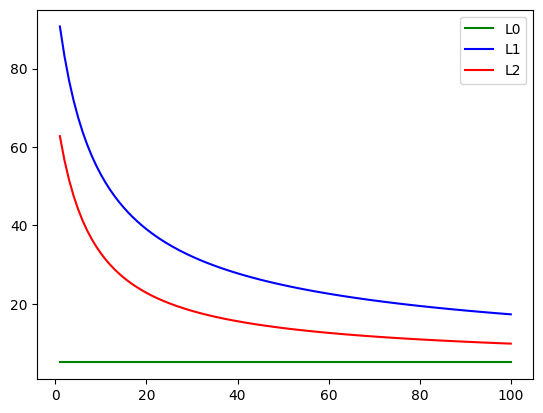

In [34]:
from sklearn.linear_model import Ridge
d = 5
factors = np.arange(1, 101)
L0, L1, L2 = [], [], []
X_train, X_test = X_train_second, X_test_second
y_train, y_test = y_train_second, y_test_second

for factor in factors:
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X_train)
    r = Ridge(factor)
    r.fit(phi, y_train)
    L0.append(nonzeroes(r.coef_[0]))
    L1.append(np.sum(abs(r.coef_)))
    L2.append(np.sqrt(np.sum(np.square(r.coef_))))

plt.plot(factors, L0, color="green", label="L0")
plt.plot(factors, L1, color="blue", label="L1")
plt.plot(factors, L2, color="red", label="L2")
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

c:\Users\Antonio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.051e+02, tolerance: 2.409e+02
  model = cd_fast.enet_coordinate_descent(


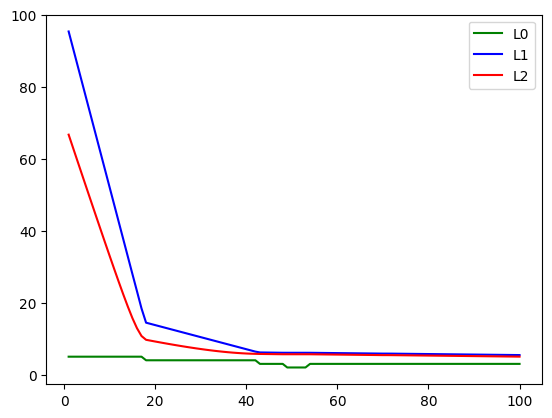

In [35]:
from sklearn.linear_model import Lasso
d = 5
factors = np.arange(1, 101)
L0, L1, L2 = [], [], []
X_train, X_test = X_train_second, X_test_second
y_train, y_test = y_train_second, y_test_second

for factor in factors:
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X_train)
    l = Lasso(factor)
    l.fit(phi, y_train)
    L0.append(nonzeroes(l.coef_))
    L1.append(np.sum(abs(l.coef_)))
    L2.append(np.sqrt(np.sum(np.square(l.coef_))))

plt.plot(factors, L0, color="green", label="L0")
plt.plot(factors, L1, color="blue", label="L1")
plt.plot(factors, L2, color="red", label="L2")
plt.legend()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [36]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

Text(0.5, 1.0, 'Ocjena na studiju ovsina o ocjenama srenje škole')

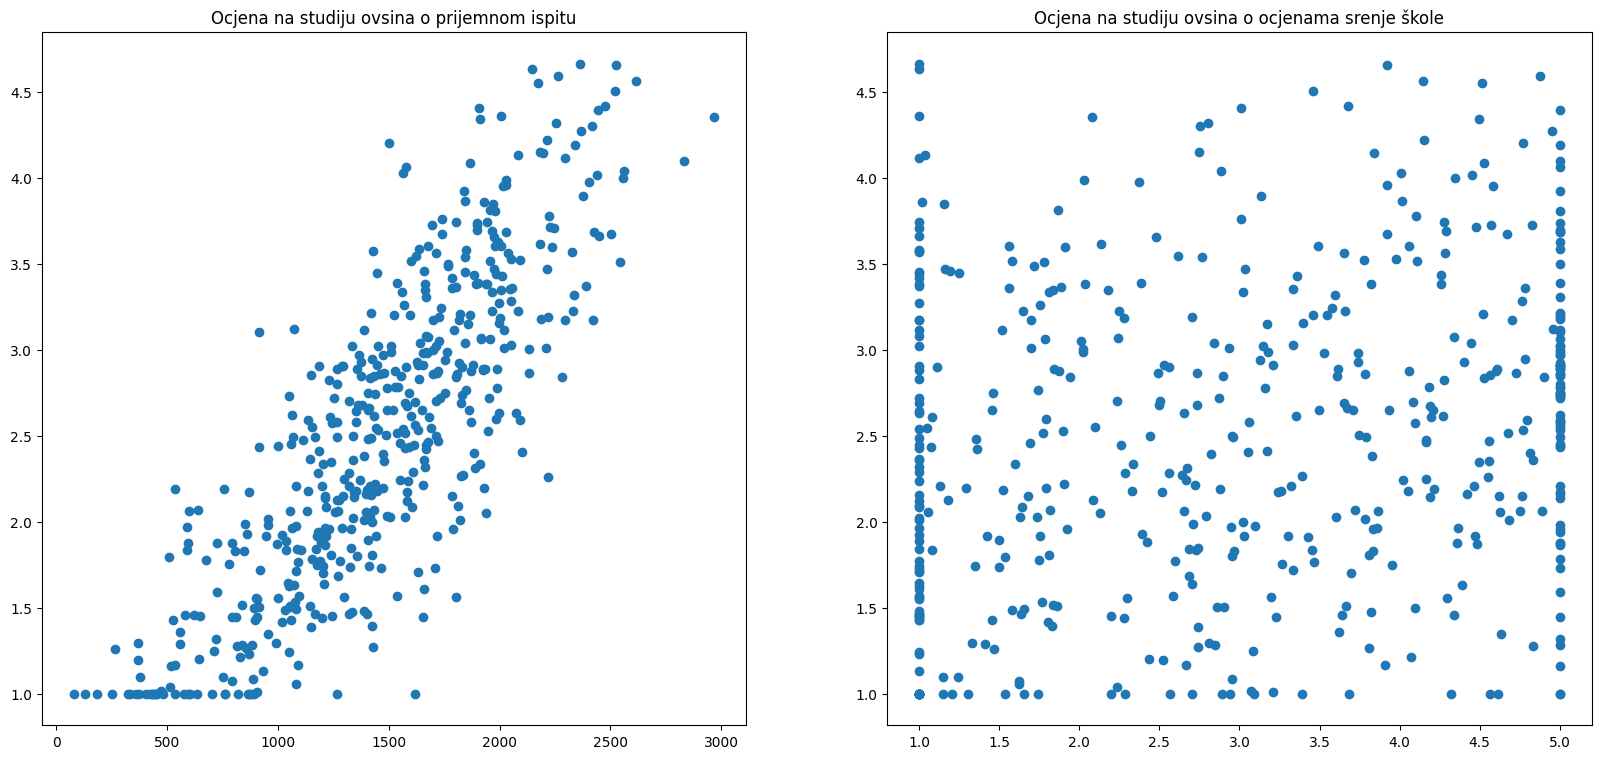

In [37]:
fig = plt.figure(figsize = (20, 9))
s1 = fig.add_subplot(1, 2, 1)
s1.scatter(exam_score, grades_y)
s1.set_title("Ocjena na studiju ovsina o prijemnom ispitu")
s2 = fig.add_subplot(1, 2, 2)
s2.scatter(grade_in_highschool, grades_y)
s2.set_title("Ocjena na studiju ovsina o ocjenama srenje škole")

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [38]:
factor = 0.01
poly = PolynomialFeatures(1)
phi = poly.fit_transform(grades_X)
r = Ridge(0.01)
r.fit(phi, grades_y)
print(r.intercept_)
print(r.coef_)

0.1506117957577615
[0.         0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y = grades_y.reshape(500, 1)
grades_y_fixed = scaler.fit_transform(grades_y)
factor = 0.01
poly = PolynomialFeatures(1)
phi = poly.fit_transform(grades_X_fixed)
r = Ridge(0.01)
r.fit(phi, grades_y_fixed)
print(r.intercept_)
print(r.coef_)

[8.07023426e-17]
[[0.         0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [40]:
grades_X_fixed_colinear = np.array([grades_X_fixed[:,0], grades_X_fixed[:,1], grades_X_fixed[:,1]]).T
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [41]:
factor = 0.01
poly = PolynomialFeatures(1)
phi = poly.fit_transform(grades_X_fixed_colinear)
r = Ridge(0.01)
r.fit(phi, grades_y_fixed)
print(r.intercept_)
print(r.coef_)

[8.07031579e-17]
[[0.         0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *6b* (valjda). Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [42]:
w01 = []
w1000 = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, train_size=0.5)
    poly = PolynomialFeatures(1)
    phi_train = poly.fit_transform(X_train)
    phi_test = poly.fit_transform(X_test)
    trunacted = np.identity(4)
    trunacted[0][0] = 0

    for factor in [0.01, 1000]:
        inv = linalg.inv(phi_train.T @ phi_train + factor * trunacted)
        w = inv @ phi_train.T @ y_train
        if factor == 0.01:
            w01.append(w)
        else:
            w1000.append(w)
        print ("{}. pokus, lambda {}, težine {}".format(i+1, factor, w.reshape(4,)))

for factor in [0.01, 1000]:
    l = []
    for i in range(1, 4):
        if factor == 0.01:
            l.append(np.std(np.array(w01)[:,i]))
        else:
            l.append(np.std(np.array(w1000)[:,i]))
    print("standardna devijacija težina za lambda = {}".format(factor))
    print(l)

1. pokus, lambda 0.01, težine [-0.01045662  0.79385128  0.06504303  0.06504303]
1. pokus, lambda 1000, težine [-0.0234989   0.16436364  0.03812874  0.03812874]
2. pokus, lambda 0.01, težine [0.02152062 0.80739011 0.0761075  0.0761075 ]
2. pokus, lambda 1000, težine [0.03212117 0.15992321 0.02415424 0.02415424]
3. pokus, lambda 0.01, težine [0.00921447 0.814158   0.07673386 0.07673386]
3. pokus, lambda 1000, težine [-0.02601733  0.16128257  0.02717137  0.02717137]
4. pokus, lambda 0.01, težine [-0.01820559  0.83265053  0.07483515  0.07483515]
4. pokus, lambda 1000, težine [-0.04966402  0.16579999  0.03405283  0.03405283]
5. pokus, lambda 0.01, težine [0.01261939 0.79735626 0.08013669 0.08013669]
5. pokus, lambda 1000, težine [-0.0250465   0.15703356  0.02664742  0.02664742]
6. pokus, lambda 0.01, težine [0.00283109 0.81845427 0.04525193 0.04525193]
6. pokus, lambda 1000, težine [0.01706322 0.17833349 0.03188297 0.03188297]
7. pokus, lambda 0.01, težine [-0.04553636  0.80086373  0.061455

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.